<a href="https://colab.research.google.com/github/neamagalal/bankmarketinf/blob/main/bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
bank=pd.read_csv('/content/bank-additional-full.csv')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
for column in bank[['housing','loan','y','contact','marital','job','education','default','month','day_of_week']] :
  label_encoder = preprocessing.LabelEncoder()
  bank[column]= label_encoder.fit_transform(bank[column])
bank.head(100)  

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,7,1,5,0,2,0,1,6,1,221,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
96,42,4,1,6,0,0,0,1,6,1,426,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
97,53,0,0,6,1,0,0,1,6,1,287,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
98,37,9,2,5,0,0,0,1,6,1,197,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [4]:
x=bank.drop(['y','poutcome'], axis=1)
y=bank['y']

In [5]:
x.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [6]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [7]:
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(x, y)

In [8]:
y_ros.value_counts()

1    36548
0    36548
Name: y, dtype: int64

SPLIT DATA

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,test_size=0.2,random_state=123)

Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Decision Tree classifer

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      7317
           1       0.94      1.00      0.97      7303

    accuracy                           0.97     14620
   macro avg       0.97      0.97      0.97     14620
weighted avg       0.97      0.97      0.97     14620



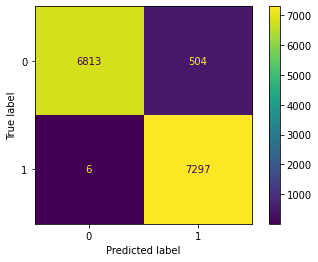

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test, y_pred))
clfAccuracy = accuracy_score(y_test,y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

LogisticRegression

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7317
           1       0.86      0.88      0.87      7303

    accuracy                           0.87     14620
   macro avg       0.87      0.87      0.87     14620
weighted avg       0.87      0.87      0.87     14620



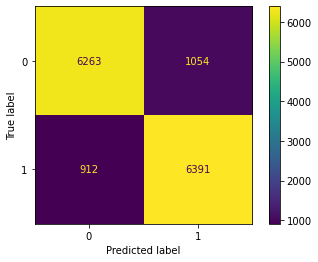

In [12]:
# Create LogisticRegression classifer object
clf2 = LogisticRegression()
# Train naive_bayes Classifer
clf2 = clf2.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf2.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test, y_pred))
clf2Accuracy = accuracy_score(y_test,y_pred)
plot_confusion_matrix(clf2, X_test, y_test)  
plt.show()

naive_bayes

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      7317
           1       0.78      0.78      0.78      7303

    accuracy                           0.78     14620
   macro avg       0.78      0.78      0.78     14620
weighted avg       0.78      0.78      0.78     14620



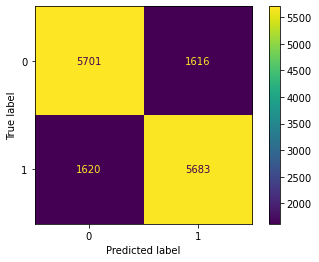

In [13]:
# Create naive_bayes classifer object
clf3 = GaussianNB()
# Train naive_bayes Classifer
clf3 = clf3.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf3.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test, y_pred))
clf3Accuracy = accuracy_score(y_test,y_pred)
plot_confusion_matrix(clf3, X_test, y_test)  
plt.show()

KNN

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      7317
           1       0.88      0.99      0.93      7303

    accuracy                           0.93     14620
   macro avg       0.93      0.93      0.93     14620
weighted avg       0.93      0.93      0.93     14620



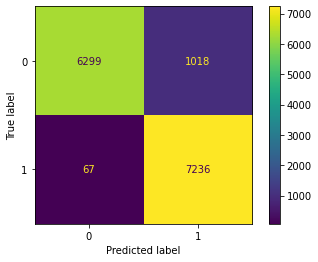

In [14]:
# Create naive_bayes classifer object
clf4 = KNeighborsClassifier()
# Train naive_bayes Classifer
clf4 = clf4.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf4.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test, y_pred))
clf4Accuracy = accuracy_score(y_test,y_pred)
plot_confusion_matrix(clf4, X_test, y_test)  
plt.show()

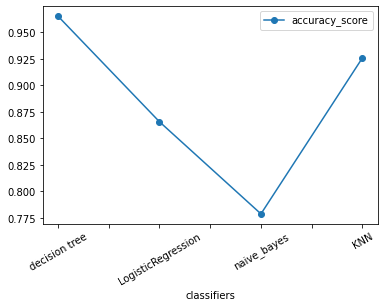

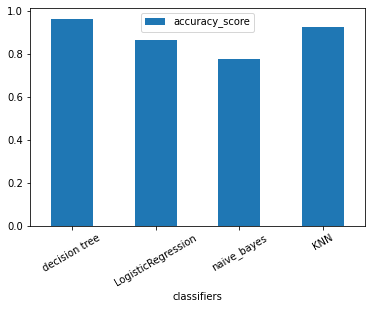

In [15]:
df = pd.DataFrame({'classifiers':['decision tree', 'LogisticRegression','naive_bayes','KNN'], 'accuracy_score':[clfAccuracy ,clf2Accuracy , clf3Accuracy , clf4Accuracy]})
df.plot.line (x='classifiers', y='accuracy_score', rot=30,marker = "o")
df.plot.bar(x='classifiers', y='accuracy_score', rot=30)
plt.show(block=True);

hypertunning by gridsearch 

Fitting 15 folds for each of 160 candidates, totalling 2400 fits
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      7317
           1       0.86      0.87      0.87      7303

    accuracy                           0.87     14620
   macro avg       0.87      0.87      0.87     14620
weighted avg       0.87      0.87      0.87     14620



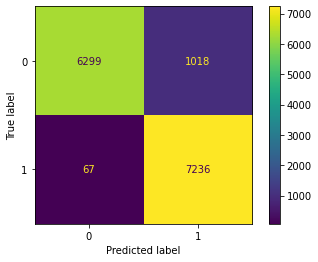

In [16]:
params = {'max_iter': list(range(2, 10)), 'penalty': ['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_search_cv = GridSearchCV(LogisticRegression(random_state=42), params, verbose=1, cv=15)
grid_search_cv=grid_search_cv.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = grid_search_cv.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test, y_pred))
clf4Accuracy = accuracy_score(y_test,y_pred)
plot_confusion_matrix(clf4, X_test, y_test)  
plt.show()